In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ML2_lib import loss
from ML2_lib import DC_SGD

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()

In [3]:
hoge = DC_SGD.DCSGD(loss_type=son,lr=0.01,c=c,fixed_lr=True)
fuga = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=True)

In [4]:
k = 20
x,y = fuga.generate_dataset()
w , _ = hoge.learn(k=k,w_init=w_init,x=x,y=y)

  0%|          | 0/2 [00:00<?, ?it/s]

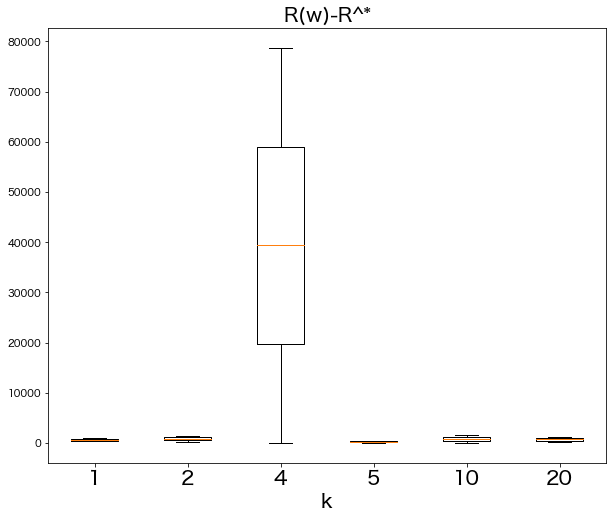

In [5]:
_, result_loss_gauss = fuga.many_trails(trial_num=2,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [6]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,655.977799,893.006137,39379.545079,317.074850,837.888495,747.545416
std,433.286092,858.459883,55647.505814,298.262611,1000.837214,773.985605
min,349.598265,285.983332,30.816362,106.171335,130.189714,200.254946
25%,502.788032,589.494735,19705.180720,211.623093,484.039105,473.900181
50%,655.977799,893.006137,39379.545079,317.074850,837.888495,747.545416
75%,809.167566,1196.517539,59053.909437,422.526608,1191.737886,1021.190651
max,962.357333,1500.028941,78728.273796,527.978366,1545.587276,1294.835886


In [7]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,809.167566,1196.517539,59053.909437,422.526608,1191.737886,1021.190651
0.80,839.805519,1257.219819,62988.782309,443.616959,1262.507764,1075.919698
0.90,901.081426,1378.624380,70858.528052,485.797663,1404.047520,1185.377792
0.95,931.719380,1439.326661,74793.400924,506.888014,1474.817398,1240.106839
0.99,956.229742,1487.888485,77941.299221,523.760295,1531.433300,1283.890077


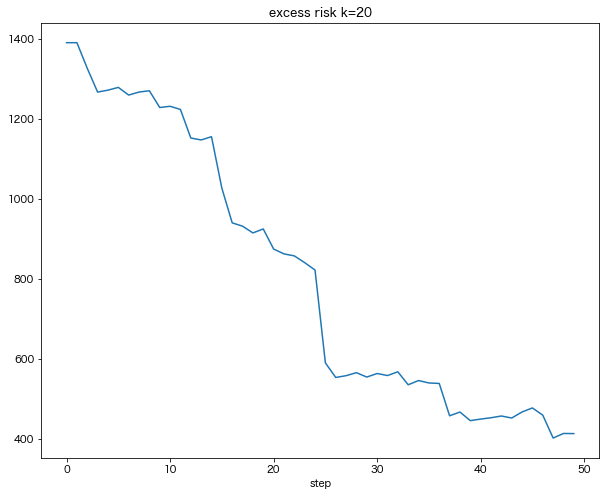

In [8]:
_,loss_transition = fuga.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [9]:
data_boston = load_boston()

In [10]:
x = data_boston.data
# x = x.T
x.shape


(506, 13)

In [11]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x = np.c_[x,np.ones(x.shape[0])]
w_init = np.zeros(x.shape[1]).reshape(1,-1)

In [12]:
y = data_boston.target.reshape(1,-1)
y = y.T
y.shape

(506, 1)

In [13]:
# データセットを分割する関数の読み込み


# 訓練用データセットとテスト用データセットへの分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

son = loss.LinearQuadraticLoss()

In [14]:
hoge = DC_SGD.DCSGDRealData(loss_type=son,c=1 ,lr=0.1)

In [15]:
k=5
hoge.learn_data(k=k,w_init=w_init,x=x_train,y=y_train)


In [16]:
hoge.predict(x_test[1].reshape(1,-1))

59.806259365917825

In [17]:
y_test[1]

array([50.])

In [27]:
w_,tr = hoge.transition(x_train,y_train)

x (455, 14)
y (455, 1)
[298.64554945]
x (455, 14)
y (455, 1)
[298.64554945]
x (455, 14)
y (455, 1)
[236.00870467]
x (455, 14)
y (455, 1)
[725.39775978]
x (455, 14)
y (455, 1)
[181.97798766]
x (455, 14)
y (455, 1)
[211.93599663]
x (455, 14)
y (455, 1)
[149.85961627]
x (455, 14)
y (455, 1)
[135.24563422]
x (455, 14)
y (455, 1)
[513.87451646]
x (455, 14)
y (455, 1)
[426.20767609]
x (455, 14)
y (455, 1)
[233.33630182]
x (455, 14)
y (455, 1)
[233.44652296]
x (455, 14)
y (455, 1)
[233.77849339]
x (455, 14)
y (455, 1)
[273.83386275]
x (455, 14)
y (455, 1)
[235.39329307]
x (455, 14)
y (455, 1)
[246.54535385]
x (455, 14)
y (455, 1)
[219.86840691]
x (455, 14)
y (455, 1)
[203.97921807]
x (455, 14)
y (455, 1)
[212.22242727]
x (455, 14)
y (455, 1)
[191.47957291]
x (455, 14)
y (455, 1)
[190.3278453]
x (455, 14)
y (455, 1)
[179.83862784]
x (455, 14)
y (455, 1)
[234.94741395]
x (455, 14)
y (455, 1)
[167.19232928]
x (455, 14)
y (455, 1)
[164.87746597]
x (455, 14)
y (455, 1)
[167.0679422]
x (455, 14)
y 

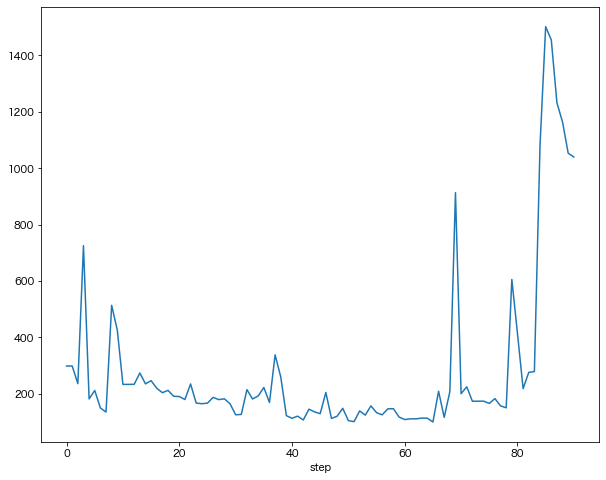

In [28]:

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(tr)
ax1.set_xlabel("step")
plt.show()